In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import io
import pandas as pd

In [0]:
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Temperature - Sheet1.csv to Temperature - Sheet1.csv


In [6]:
#Take the dataset of AC,OUTSIDE,ROOM of ideal AC scenario
df = pd.read_csv(io.BytesIO(uploaded['Temperature - Sheet1.csv']))
df.head()

,AC Temperature,Outside Temperature,Room Temperature
0,20,39,21
1,19,35,20
2,24,36,25
3,17,37,19
4,25,36,29


In [18]:
df.describe()

,AC Temperature,Outside Temperature,Room Temperature
count,199.000000,199.000000,199.000000
mean,20.668342,37.643216,23.216080
std,2.885098,1.708074,3.072942
min,16.000000,35.000000,17.000000
25%,18.000000,36.000000,21.000000
50%,21.000000,38.000000,24.000000
75%,23.000000,39.000000,26.000000
max,25.000000,40.000000,29.000000


In [7]:
#AC temperature and Outside Temperature will be trained to output Room Temperature
X=df.drop(['Room Temperature'],axis=1) 
print(X.head())

   AC Temperature  Outside Temperature
0              20                   39
1              19                   35
2              24                   36
3              17                   37
4              25                   36


In [8]:
#Room Temperature
Y=df.iloc[:,-1].values
print(Y)

[21 20 25 19 29 21 26 23 27 27 25 26 28 21 25 27 20 20 25 23 24 24 28 23
 24 23 28 22 19 18 18 22 25 25 28 25 19 23 21 22 23 17 28 26 26 26 22 25
 26 18 26 23 22 25 22 24 25 26 20 24 23 23 22 26 24 20 24 24 25 20 25 28
 26 23 17 25 17 25 26 23 19 22 23 25 20 21 21 19 20 26 20 26 24 24 22 26
 23 29 27 17 27 18 20 26 23 19 25 20 19 20 24 20 22 19 26 28 27 27 23 27
 20 17 27 26 21 23 24 22 17 26 23 26 25 27 28 27 21 21 26 26 21 25 23 20
 21 19 23 22 18 21 24 27 17 25 27 18 27 25 26 18 21 19 25 24 22 23 18 26
 28 26 21 24 25 27 22 24 19 24 26 20 23 21 25 27 25 25 18 24 22 28 17 25
 21 25 27 24 19 22 25]


In [0]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [0]:
#split Training and Test Data set
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=42,
)

In [11]:
#Train the model
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
#The coeifficient
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
AC Temperature,1.001195
Outside Temperature,0.043907


In [20]:
#Intercept
print(reg.intercept_)

0.9386210796202725


In [12]:
#Accuracy
reg.score(X_test,Y_test)

0.8621065931180779

In [0]:
#Lets see the Actual and Predict for the test data set
Y_pred = reg.predict(X_test)

In [24]:
op = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
op.head()

,Actual,Predicted
0,23,24.721187
1,27,27.724771
2,20,19.627399
3,24,23.676085
4,17,18.714019


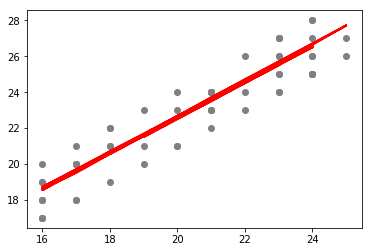

In [37]:
plt.scatter(X_test['AC Temperature'], Y_test,  color='gray')
plt.plot(X_test['AC Temperature'], Y_pred, color='red', linewidth=2)
plt.show()


In [33]:
#The condition if the deviation in room temperature is more than 5, Servicing needed
ac=17
outside=39
room=25
room_predict=reg.predict([[ac,outside]])
if(room-room_predict>5):
    print('AC Health : Servicing Needed')
elif(room-room_predict<5):
    print('AC Health : Good')


AC Health : Servicing Needed


In [0]:
#references
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f